In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
mouse_clinical = pd.merge(mouse_df,clinical_df, on='Mouse ID')


# Display the data table for preview
mouse_clinical.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [16]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

grouped_mouse_clinical = mouse_clinical.groupby(['Drug', 'Timepoint'])

grouped_mouse_clinical = grouped_mouse_clinical.agg({'Tumor Volume (mm3)':'mean'})

grouped_mouse_clinical.head()

# Convert to DataFrame
Mean_Tumor_Volume = grouped_mouse_clinical.reset_index()

Mean_Tumor_Volume.count()




Drug                  100
Timepoint             100
Tumor Volume (mm3)    100
dtype: int64

In [17]:
# Preview DataFrame
Mean_Tumor_Volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [18]:
# Minor Data Munging to Re-Format the Data Frames

MeanTumorVolume = Mean_Tumor_Volume.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked

MeanTumorVolume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [19]:
#Check and drop any rows with NA/null data -no rows with missing data identified
MeanTumorVolume = MeanTumorVolume.dropna(how='any')
MeanTumorVolume.count()

Drug
Capomulin    10
Ceftamin     10
Infubinol    10
Ketapril     10
Naftisol     10
Placebo      10
Propriva     10
Ramicane     10
Stelasyn     10
Zoniferol    10
dtype: int64

In [20]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

grouped_mouse_clinical = mouse_clinical.groupby(['Drug', 'Timepoint'])
stderror = grouped_mouse_clinical.agg({'Tumor Volume (mm3)':'sem'})

# Convert to DataFrame
stderror_reset = stderror.reset_index()

# Preview DataFrame
stderror_reset.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [22]:
# Minor Data Munging to Re-Format the Data Frames

SEMTumorVolume = stderror_reset.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked

SEMTumorVolume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


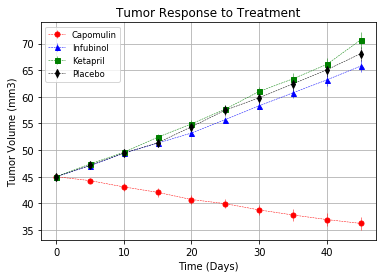

In [29]:
# Generate the Plot (with Error Bars)

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

plt.errorbar(MeanTumorVolume.index, MeanTumorVolume["Capomulin"], yerr=SEMTumorVolume["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(MeanTumorVolume.index, MeanTumorVolume["Infubinol"], yerr=SEMTumorVolume["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(MeanTumorVolume.index, MeanTumorVolume["Ketapril"], yerr=SEMTumorVolume["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(MeanTumorVolume.index, MeanTumorVolume["Placebo"], yerr=SEMTumorVolume["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Tumor Response to Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("../TumorResponse.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [33]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

grouped_mouse_clinical = mouse_clinical.groupby(['Drug', 'Timepoint'])

grouped_mouse_metastatic = grouped_mouse_clinical.agg({'Metastatic Sites':'mean'})

grouped_mouse_metastatic.head()

# Convert to DataFrame
mean_reset = grouped_mouse_metastatic.reset_index()

# Preview DataFrame
mean_reset.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [34]:
# Minor Data Munging to Re-Format the Data Frames

mtstc_switch = mean_reset.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked

mtstc_switch.head()




Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [38]:
# Store the SEM Met. Site Data Grouped by Drug and Timepoint 

mtstc_sem = mouse_clinical.groupby(['Drug', 'Timepoint'])

grouped_mtstc_sem = mtstc_sem.agg({'Metastatic Sites':'sem'})

grouped_mtstc_sem.head()


# Convert to DataFrame
mtstc_sem_reset = grouped_mtstc_sem.reset_index()

# Preview DataFrame
mtstc_sem_reset.head()




,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [40]:
# Minor Data Munging to Re-Format the Data Frames

mtstc_sem_switch = mtstc_sem_reset.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked

mtstc_sem_switch.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


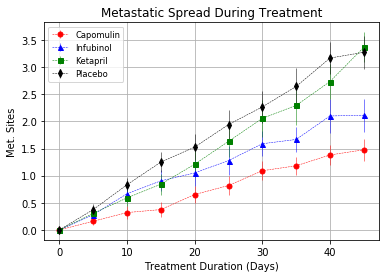

In [44]:
# Generate the Plot (with Error Bars)

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

plt.errorbar(mtstc_switch.index, mtstc_switch["Capomulin"], yerr=mtstc_sem_switch["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mtstc_switch.index, mtstc_switch["Infubinol"], yerr=mtstc_sem_switch["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mtstc_switch.index, mtstc_switch["Ketapril"], yerr=mtstc_sem_switch["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(mtstc_switch.index, mtstc_switch["Placebo"], yerr=mtstc_sem_switch["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)


# Save the Figure
plt.savefig("../Images/MetastaticMean.png")

# Show the Figure
plt.show()



In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure 

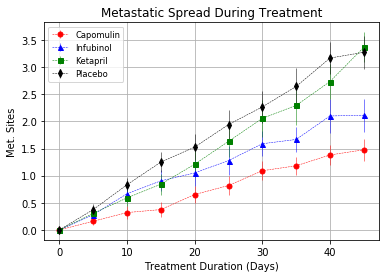

## Survival Rates

In [42]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

grouped_survival_rates = mouse_clinical.groupby(['Drug', 'Timepoint'])

grouped_mouse_ID = grouped_survival_rates.agg({'Mouse ID':'count'})

grouped_mouse_ID.head()

# Convert to DataFrame
ID_reset = grouped_mouse_ID.reset_index()

# Preview DataFrame
ID_reset.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [46]:
# Minor Data Munging to Re-Format the Data Frames

ID_switch = ID_reset.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview that Reformatting worked

ID_switch.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


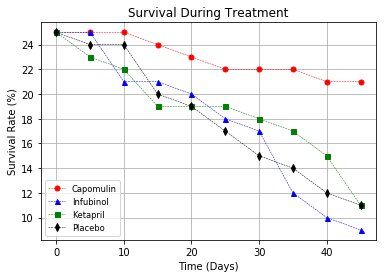

In [49]:
# Generate the Plot (Accounting for percentages)

fig, ax1 = plt.subplots()

#ax2 = ax1.twinx()

plt.errorbar(ID_switch.index, ID_switch["Capomulin"],  color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(ID_switch.index, ID_switch["Infubinol"],  color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(ID_switch.index, ID_switch["Ketapril"],  color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(ID_switch.index, ID_switch["Placebo"],  color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(loc="best", fontsize="small", fancybox=True)


# Save the Figure
plt.savefig("../Images/SurvivalRates.png")

# Show the Figure
plt.show()



## Summary Bar Graph

In [53]:
# Calculate the percent changes for each drug

#Group by Drug/Treatment
#print(tumor_treatment_grouped)
initial_volume=mouse_clinical.loc[mouse_clinical['Timepoint'] ==0, ['Drug', 'Tumor Volume (mm3)']]
final_volume=mouse_clinical.loc[mouse_clinical['Timepoint'] ==45, ['Drug', 'Tumor Volume (mm3)']]

# Display the data to confirm

#initial_volume.head()
final_volume.head()

,Drug,Tumor Volume (mm3)
17,Stelasyn,61.619606
27,Stelasyn,60.122011
76,Stelasyn,75.123690
86,Stelasyn,62.765093
96,Stelasyn,68.711630


In [85]:
#Calculate change in tumor size over time
initial=initial_volume.set_index('Drug')
final=final_volume.set_index('Drug') 
change=((final-initial)/initial)*100

mean_change = change.reset_index()

grouped_mean = mean_change.groupby(['Drug'])
mean_change = grouped_mean.agg({'Tumor Volume (mm3)':'mean'})

mean_change


,Tumor Volume (mm3)
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


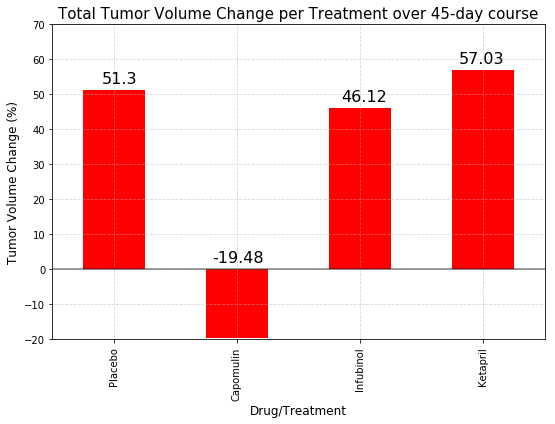

In [100]:
# #Select columns to plot
drug_tuple=mean_change.loc[['Placebo', 'Capomulin', 'Infubinol', 'Ketapril']]
#print(drug_tuple)

# Create a bar chart
drug_tuple.plot(kind="bar", figsize=(8, 6), legend=False, color=['r', 'g', 'r', 'r'])

# Set chart parameters
plt.title("Total Tumor Volume Change per Treatment over 45-day course", fontsize =15)
plt.xlabel("Drug/Treatment", fontsize=12)
plt.ylabel("Tumor Volume Change (%)", fontsize =12)
plt.ylim (-20, 70)
plt.tight_layout()

#need to create a loop to place text on bar more easily
plt.text(-0.095, percentages[0]+2, percentages[0], fontsize=16)
plt.text(0.8, 0+2, percentages[1], fontsize=16)
plt.text(1.85, percentages[2]+2, percentages[2], fontsize=16)
plt.text(2.8, percentages[3]+2, percentages[3], fontsize=16)
plt.axhline(0, color='k', alpha=0.5)
plt.grid(True, alpha=0.5, ls='dashed')    
plt.show()

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

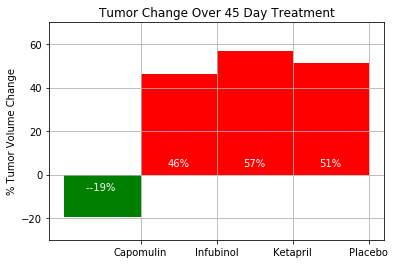